# 2. PCA: Food Consumption in European Countries

## 2.1

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
import pandas as pd

In [233]:
dat = pd.read_csv("data/food-consumption.csv")

atr = dat.iloc[:,1:21]
country = dat.iloc[:,0]
m,n = atr.shape
atr

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,90,49,88,19,57,51,19,21,27,21,81,75,44,71,22,91,85,74,30,26
1,82,10,60,2,55,41,3,2,4,2,67,71,9,46,80,66,24,94,5,18
2,88,42,63,4,76,53,11,23,11,5,87,84,40,45,88,94,47,36,57,3
3,96,62,98,32,62,67,43,7,14,14,83,89,61,81,15,31,97,13,53,15
4,94,38,48,11,74,37,23,9,13,12,76,76,42,57,29,84,80,83,20,5
5,97,61,86,28,79,73,12,7,26,23,85,94,83,20,91,94,94,84,31,24
6,27,86,99,22,91,55,76,17,20,24,76,68,89,91,11,95,94,57,11,28
7,72,26,77,2,22,34,1,5,20,3,22,51,8,16,89,65,78,92,6,9
8,55,31,61,15,29,33,1,5,15,11,49,42,14,41,51,51,72,28,13,11
9,73,72,85,25,31,69,10,17,19,15,79,70,46,61,64,82,48,61,48,30


In [251]:
mu = np.array(np.mean(atr,axis = 1))
xc = atr - mu[:,None]
print(np.shape(xc))
C = np.dot(xc,xc.T)/m
print(m)
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]


(16, 20)
16


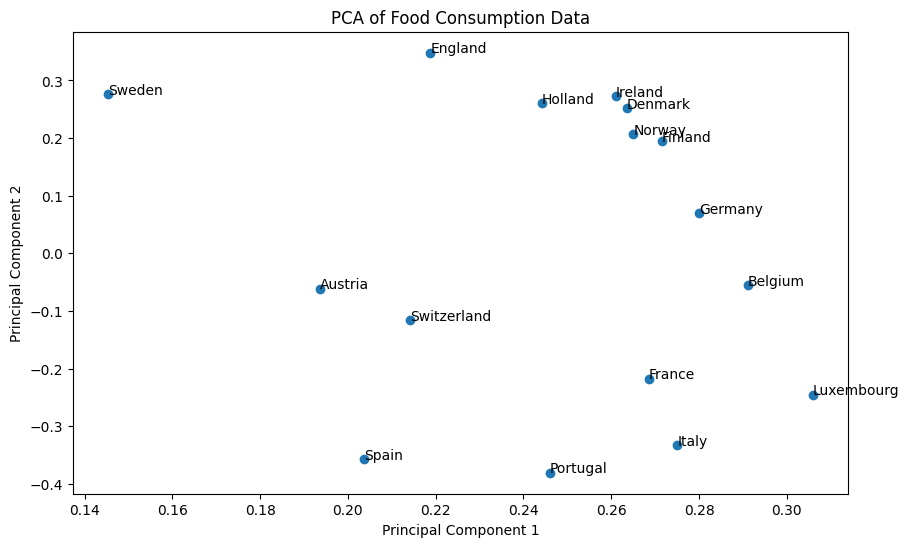

In [71]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(country):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

## 2.2

In [292]:
dat = pd.read_csv("data/food-consumption.csv")
dat = dat.T.reset_index()
country = dat.iloc[1:,1:21]
country = country.astype(float)
dat.columns = dat.iloc[0]
dat = dat[1:]
food = dat.iloc[:,0]
#country = country.to_numpy()
m,n = country.shape
food[1]

'Real coffee'

In [293]:
mu = np.array(np.mean(country,axis = 1))

xc = country - mu[:,None]
xc = np.array(xc, dtype=object)

C = np.dot(xc,xc.T)/m
C = C.astype(float)



In [294]:
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]

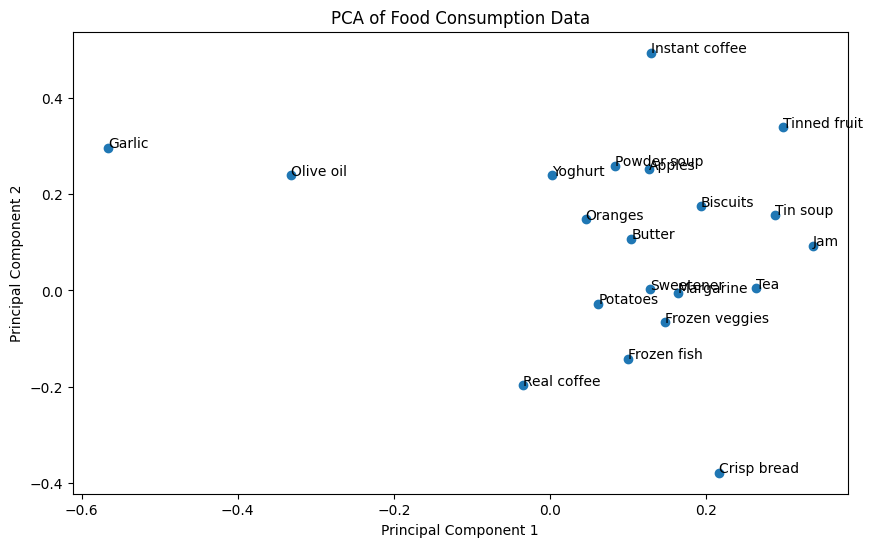

In [295]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(food):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

# 3. Order of faces using ISOMAP